 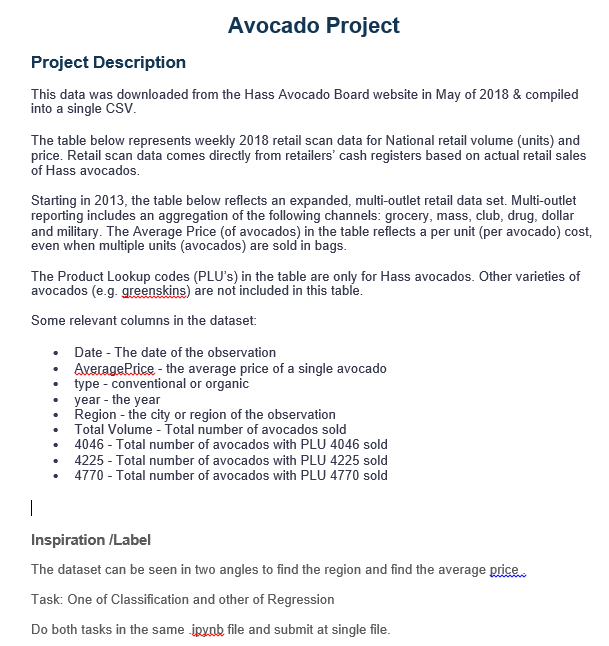

Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Avocado/avocado.csv.zip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'E:\D\Data Trained\project\avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [3]:
df = df.drop(columns=['Unnamed: 0', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags'])
df

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df = df.drop(columns=['Date'])


In [5]:
df

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico,1,14


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])
df['region'] = le.fit_transform(df['region'])
df

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,1,2018,53,1,14


In [7]:
df.describe()


,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,0.499918,2016.147899,26.495644,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,0.500014,0.939938,15.583788,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,0.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.000000,2017.000000,40.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.000000,2018.000000,53.000000,12.000000,31.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   type          18249 non-null  int32  
 6   year          18249 non-null  int64  
 7   region        18249 non-null  int32  
 8   Month         18249 non-null  int32  
 9   Day           18249 non-null  int32  
dtypes: float64(5), int32(4), int64(1)
memory usage: 1.1 MB


In [9]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [ ]:
# Visuaization

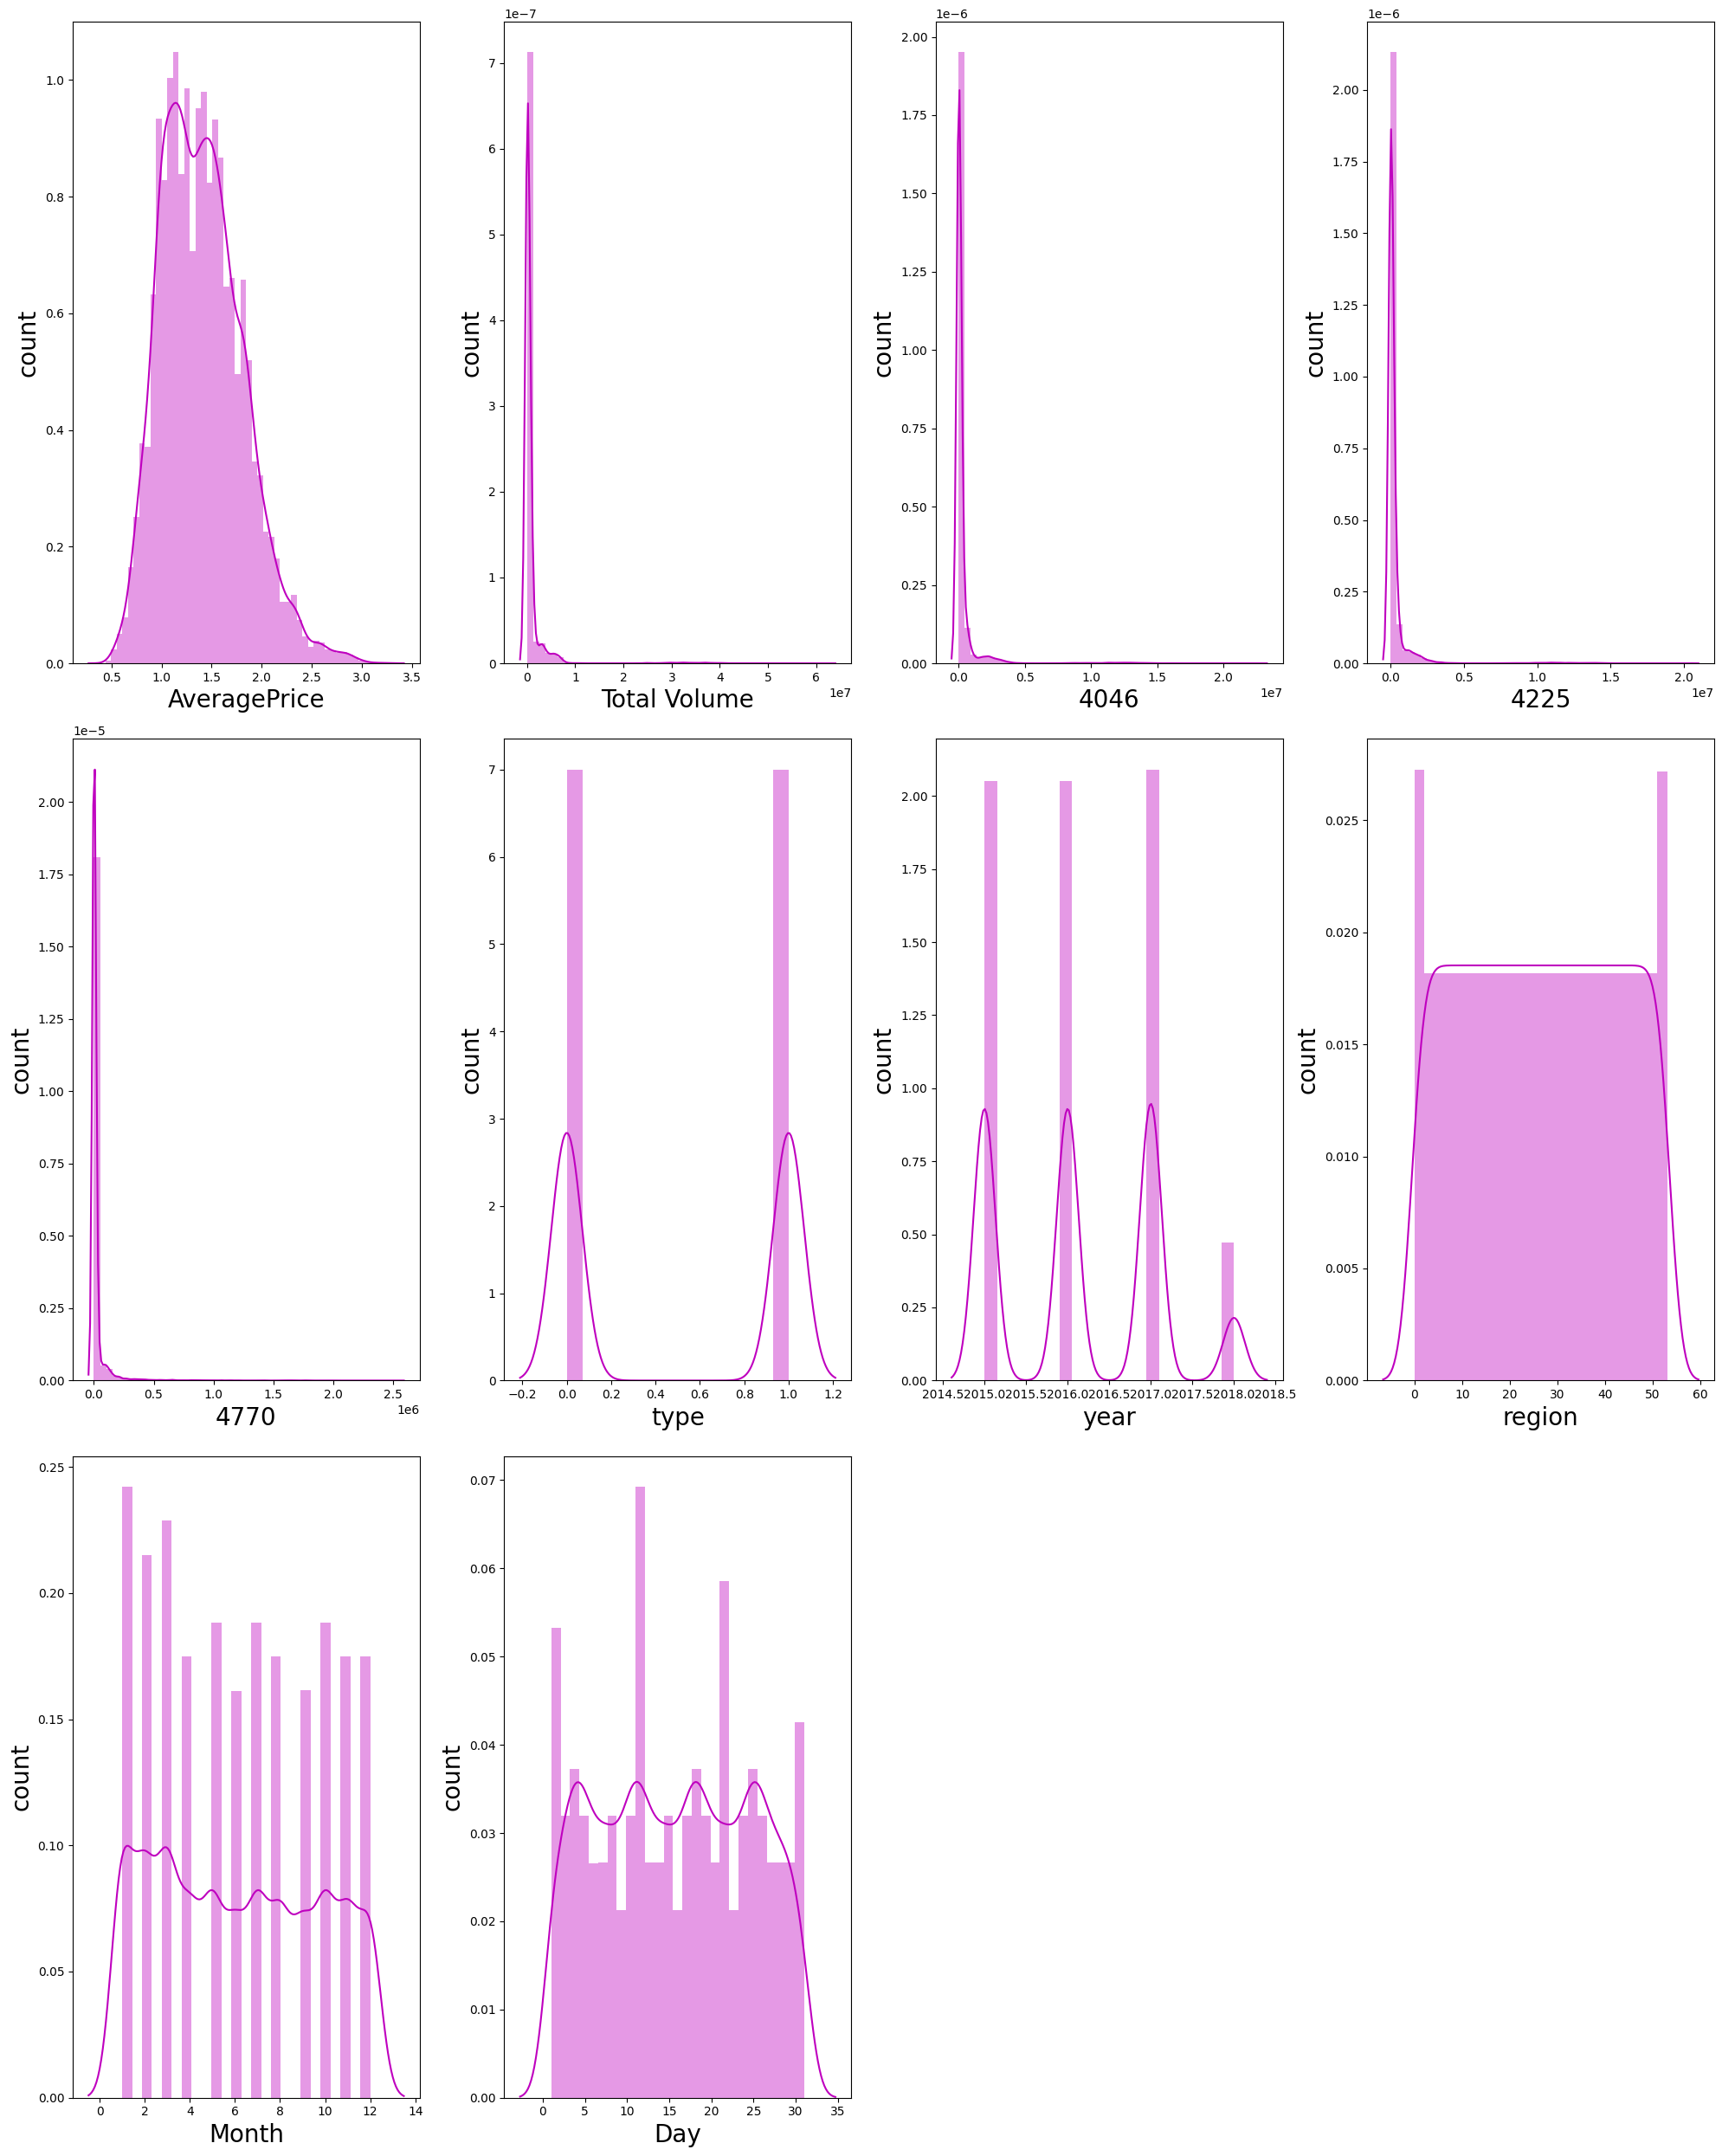

In [29]:
# checking distribution



plt.figure(figsize=(20,25),facecolor='white')

p = 1

for i in df.columns:
    if p <= 10:
        axs = plt.subplot(3, 4, p)  
        sns.distplot(df[i], color='m')
        plt.xlabel(i, fontsize=20)  # Corrected to use column name as label
        plt.ylabel('count', fontsize=20)
        
        p += 1
plt.tight_layout()
plt.show()

<Axes: >

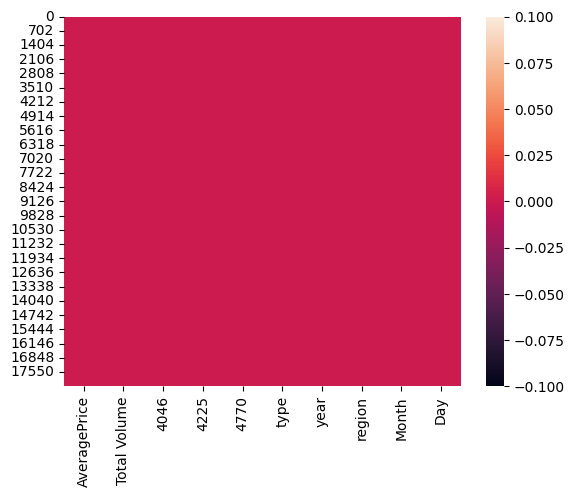

In [10]:
# lets check null value with heatmap

sns.heatmap(df.isnull())

In [11]:
# count value of each column 

for i in df.columns:
    print(df[i].value_counts())
    print('\n')

AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64


Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64


4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64


4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: count, Length: 18103, dtype: int64


4770
0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.0

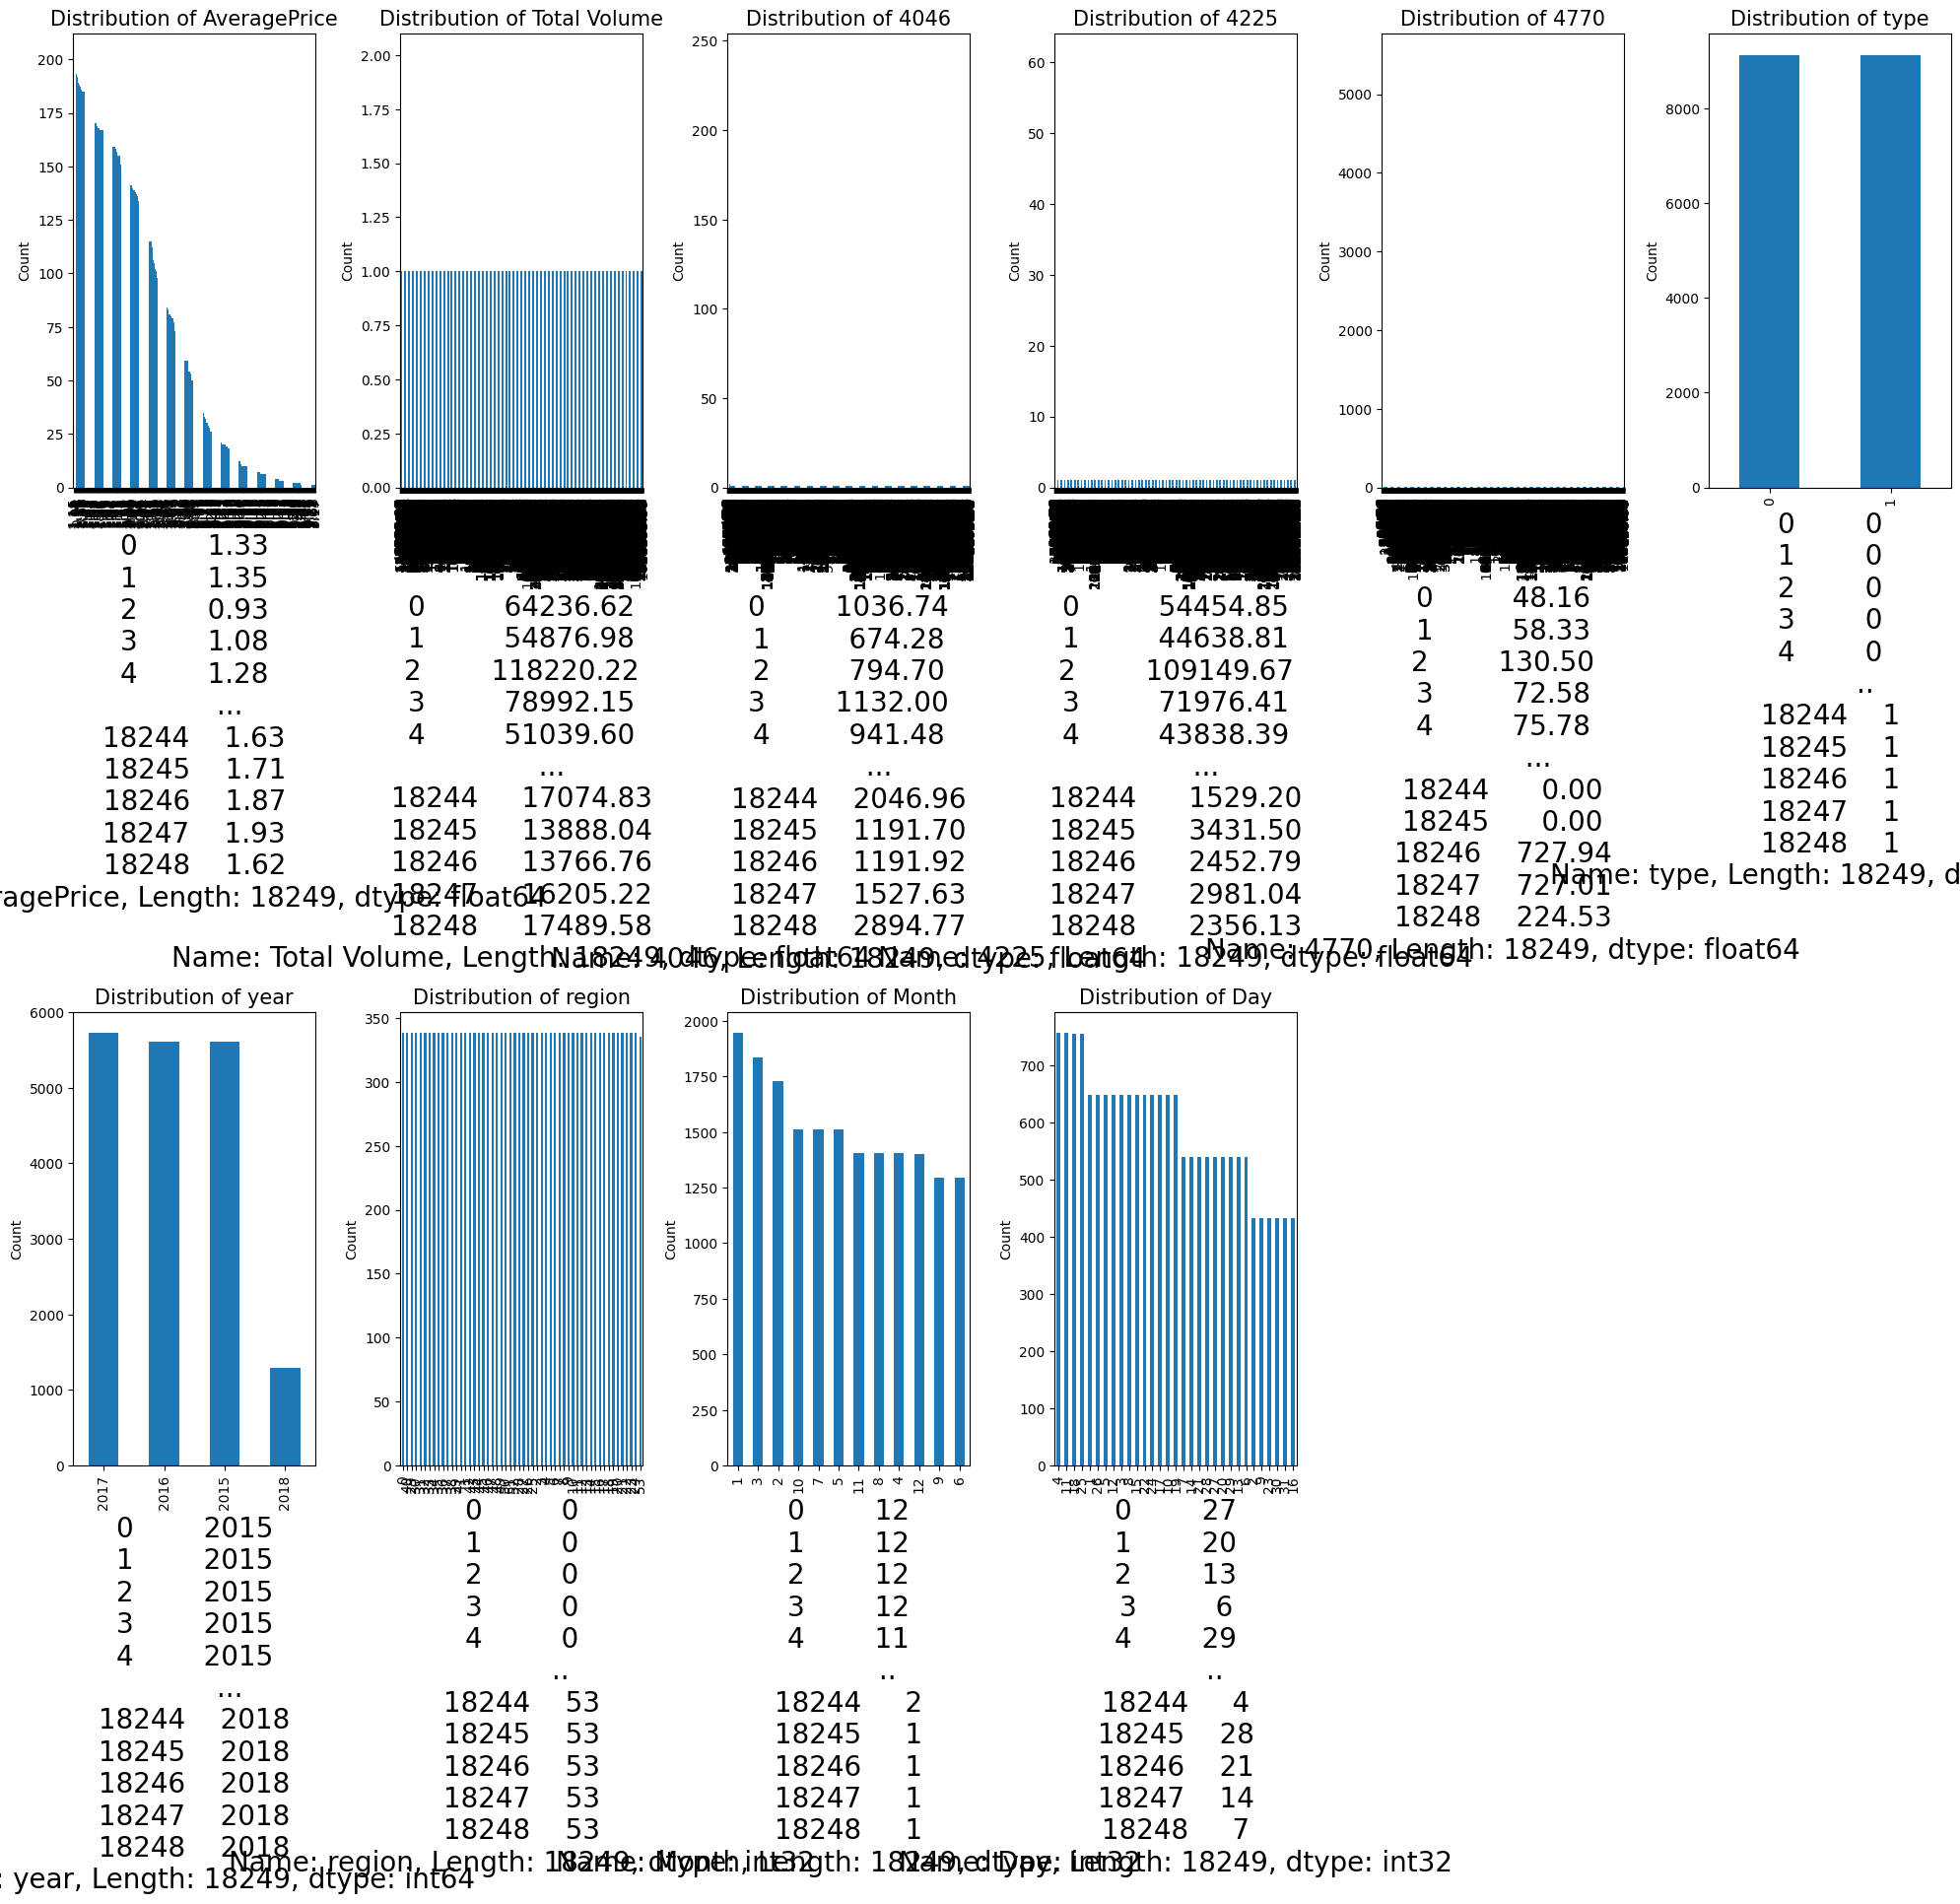

In [12]:
plt.figure(figsize=(20,25))

p=1       
for i in df.columns:
    if p<=14:
        ax=plt.subplot(3,6,p)
        df[i].value_counts().plot(kind='bar', ax=ax)
        plt.title(f"Distribution of {i}",fontsize=15)
        plt.xlabel(df[i], fontsize=20)
        plt.ylabel('Count')
        
        p+=1
plt.tight_layout()
plt.show()
        
    

In [ ]:
# Classification: Predict the type (conventional or organic)
X_class = df.drop(columns=['type'])
y_class = df['type']

# Regression: Predict the average price
X_reg = df.drop(columns=['AveragePrice'])
y_reg = df['AveragePrice']

In [ ]:
# Drop unnecessary columns
columns_to_keep = ['Date', 'AveragePrice', 'type', 'year', 'region', 'Total Volume', '4046', '4225', '4770']
df = df[columns_to_keep]

In [13]:
df

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,1,2018,53,1,14
